### Analysis on `df_w_matrix.csv`
#### Load data and import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('df_w_matrix.csv')
df.shape

(231259, 262)

#### Clean our data first. Delete country names that occurs less than 20 times.
##### (We cannot rely on data occurring less than 20 times)

In [3]:
df.columns[8:]

Index(['aruba', 'afghanistan', 'angola', 'anguilla', 'åland islands',
       'albania', 'andorra', 'united arab emirates', 'argentina', 'armenia',
       ...
       'samoa', 'yemen', 'south africa', 'zambia', 'zimbabwe', 'vietnam', 'US',
       'uk', 'un', 'europe'],
      dtype='object', length=254)

In [4]:
del_ls = [] # A list of country names that needs deleting.
for country in df.columns[8:]:
    if sum(df[country])<=20:
        del_ls.append(country)
print(len(del_ls))
del_ls[:10]

105


['aruba',
 'anguilla',
 'åland islands',
 'andorra',
 'united arab emirates',
 'american samoa',
 'french southern territories',
 'antigua and barbuda',
 'bonaire, sint eustatius and saba',
 'burkina faso']

In [5]:
for country in del_ls:
    del df[country]
df.shape

(231259, 157)

#### Construct dataframe `star` of `'up_votes'` and word frequency

In [6]:
str1 = ['up_votes']
str1.extend(list(df.columns[8:]))
str1[:5]

['up_votes', 'afghanistan', 'angola', 'albania', 'argentina']

In [7]:
star = df[str1]
star.head()

,up_votes,afghanistan,angola,albania,argentina,armenia,antarctica,australia,austria,azerbaijan,...,vanuatu,samoa,yemen,zambia,zimbabwe,vietnam,US,uk,un,europe
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Analysis
Take a general look at the distribution of the `up_votes` and the mean.

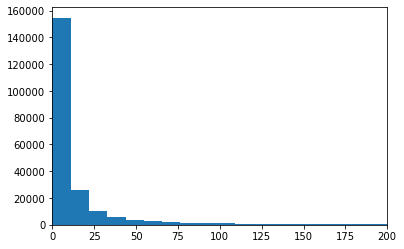

In [8]:
plt.hist(star['up_votes'],1000)
plt.xlim(0,200)
plt.show()

In [9]:
mean_score = np.mean(star['up_votes'])
mean_score

110.49527585953412

The mean of the `'up_votes'` is around 110.
Now, construct two lists `mean_ls` and `freq_ls`, storing mean `'up_votes'` and total occurance for every country in the articles respectively.

In [10]:
mean_ls = []
freq_ls = []

for country in star.columns[1:]:
    mean_ls.append(np.mean(star['up_votes'][star[country]!=0]))
    freq_ls.append(np.sum(star[country]))
    
print(len(mean_ls))
print(len(freq_ls))

149
149


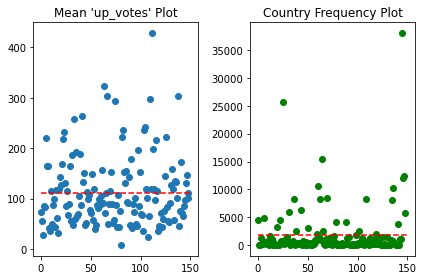

In [11]:
plt.subplot(121)
plt.scatter(x=range(len(mean_ls)), y=mean_ls)
plt.hlines(mean_score,0,150,colors = 'r',linestyles = 'dashed')
plt.title('Mean \'up_votes\' Plot')

plt.subplot(122)
plt.scatter(x=range(len(freq_ls)), y=freq_ls, color = 'g')
plt.hlines(np.mean(freq_ls),0,150,colors = 'r',linestyles = 'dashed')
plt.title('Country Frequency Plot')

plt.tight_layout()
plt.show()

#### Construct a dataframe `new_df` of columns of country names, `mean_ls` and `freq_ls`.

In [12]:
new_df = pd.DataFrame({'country' : star.columns[1:],
                       'mean_votes' : mean_ls,
                       'freq' : freq_ls})
new_df.head()

,country,mean_votes,freq
0,afghanistan,74.207822,4595.0
1,angola,55.208696,121.0
2,albania,27.607143,117.0
3,argentina,85.713223,1268.0
4,armenia,82.510638,287.0


### Test if there's a pattern between country frequency and year

In [13]:
# Pick out the top 10 frequent countries for further processing
top_10 = new_df.sort_values(by='freq', ascending = False)[:10]['country']
top_10

145         US
25       china
64      israel
147         un
146         uk
60       india
136    ukraine
69       japan
62        iraq
36       egypt
Name: country, dtype: object

In [14]:
# Pick out data that includes top_10 countries to a new dataframe df_concat
df_concat = pd.concat([star['up_votes'],df['date_created'],star[top_10]], axis = 1)
df_concat

,up_votes,date_created,US,china,israel,un,uk,india,ukraine,japan,iraq,egypt
0,3,2008-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2008-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,2008-01-25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,2008-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2008-01-28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
231254,4,2016-11-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231255,4,2016-11-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231256,4,2016-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231257,2,2016-11-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Label our data with country names
up_votes = []
countries = []
dates = []

for i in range(df_concat.shape[0]):
    for j in range(10):
        if df_concat.loc[i][j+2]!=0:
            up_votes.append(df_concat.loc[i][0])
            countries.append(df_concat.columns[j+2])
            dates.append(df_concat.loc[i][1])
        
up_votes[:5]

[2, 3, 3, 0, 3]

In [42]:
pd1 = pd.DataFrame({'up_votes': up_votes,
                    'label': countries,
                    'dates': dates})
years = pd.to_datetime(pd1['dates']).dt.year

df_n = pd.DataFrame({'up_votes': up_votes,
                     'label': countries,
                     'years': years})
df_n.head()

,up_votes,label,years
0,2,japan,2008
1,3,US,2008
2,3,egypt,2008
3,0,un,2008
4,3,US,2008


In [48]:
df_n.to_csv('df_years.csv', index = False)